In [48]:
print('Importing packages...')
from datetime import datetime
import numpy as np
import pandas as pd
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

Importing packages...


In [49]:
print('Reading data...')
dftrain = pd.read_csv('train_indessa.csv')
dftest = pd.read_csv('test_indessa.csv')
dftrain = dftrain[['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'application_type', 'verification_status_joint', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status']]
dftest = dftest[['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'application_type', 'verification_status_joint', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',]]

Reading data...


In [50]:
print('Transform: term...')
dftrain['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
dftest['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
dftrain['term'] = pd.to_numeric(dftrain['term'], errors='coerce')
dftest['term'] = pd.to_numeric(dftest['term'], errors='coerce')
print('Transform: emp_length...')
dftrain['emp_length'].replace('n/a', '0', inplace=True)
dftrain['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
dftrain['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
dftrain['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
dftrain['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
dftest['emp_length'].replace('n/a', '0', inplace=True)
dftest['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
dftest['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
dftest['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
dftest['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
dftrain['emp_length'] = pd.to_numeric(dftrain['emp_length'], errors='coerce')
dftest['emp_length'] = pd.to_numeric(dftest['emp_length'], errors='coerce')

print('Transform: last_week_pay...')
dftrain['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
dftest['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
dftrain['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)
dftest['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)
dftrain['last_week_pay'] = pd.to_numeric(dftrain['last_week_pay'], errors='coerce')
dftest['last_week_pay'] = pd.to_numeric(dftest['last_week_pay'], errors='coerce')

print('Transform: sub_grade...')
dftrain['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
dftrain['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
dftrain['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
dftrain['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
dftrain['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
dftrain['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
dftrain['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)
dftest['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
dftest['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
dftest['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
dftest['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
dftest['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
dftest['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
dftest['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)
dftrain['sub_grade'] = pd.to_numeric(dftrain['sub_grade'], errors='coerce')
dftest['sub_grade'] = pd.to_numeric(dftest['sub_grade'], errors='coerce')

print('Transform done.')

Transform: term...
Transform: emp_length...
Transform: last_week_pay...
Transform: sub_grade...
Transform done.


In [51]:
cols = ['term', 'loan_amnt', 'funded_amnt', 'last_week_pay', 'int_rate', 'sub_grade', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'emp_length']
for col in cols:
    print('Imputation with Median: %s' % (col))
    dftrain[col].fillna(dftrain[col].median(), inplace=True)
    dftest[col].fillna(dftest[col].median(), inplace=True)

cols = ['acc_now_delinq', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med']
for col in cols:
    print('Imputation with Zero: %s' % (col))
    dftrain[col].fillna(0, inplace=True)
    dftest[col].fillna(0, inplace=True)

print('Missing value imputation done.')

Imputation with Median: term
Imputation with Median: loan_amnt
Imputation with Median: funded_amnt
Imputation with Median: last_week_pay
Imputation with Median: int_rate
Imputation with Median: sub_grade
Imputation with Median: annual_inc
Imputation with Median: dti
Imputation with Median: mths_since_last_delinq
Imputation with Median: mths_since_last_record
Imputation with Median: open_acc
Imputation with Median: revol_bal
Imputation with Median: revol_util
Imputation with Median: total_acc
Imputation with Median: total_rec_int
Imputation with Median: mths_since_last_major_derog
Imputation with Median: tot_coll_amt
Imputation with Median: tot_cur_bal
Imputation with Median: total_rev_hi_lim
Imputation with Median: emp_length
Imputation with Zero: acc_now_delinq
Imputation with Zero: total_rec_late_fee
Imputation with Zero: recoveries
Imputation with Zero: collection_recovery_fee
Imputation with Zero: collections_12_mths_ex_med
Missing value imputation done.


In [52]:

test_member_id = pd.DataFrame(dftest['member_id'])

train_target = pd.DataFrame(dftrain['loan_status'])

selected_cols = ['member_id', 'emp_length', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'sub_grade', 'int_rate', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'mths_since_last_major_derog', 'last_week_pay', 'tot_cur_bal', 'total_rev_hi_lim', 'tot_coll_amt', 'recoveries', 'collection_recovery_fee', 'term', 'acc_now_delinq', 'collections_12_mths_ex_med']
finaltrain = dftrain[selected_cols]
finaltest = dftest[selected_cols]


finaltrain['loan_to_income'] = finaltrain['annual_inc']/finaltrain['funded_amnt_inv']
finaltest['loan_to_income'] = finaltest['annual_inc']/finaltest['funded_amnt_inv']


finaltrain['bad_state'] = finaltrain['acc_now_delinq'] + (finaltrain['total_rec_late_fee']/finaltrain['funded_amnt_inv']) + (finaltrain['recoveries']/finaltrain['funded_amnt_inv']) + (finaltrain['collection_recovery_fee']/finaltrain['funded_amnt_inv']) + (finaltrain['collections_12_mths_ex_med']/finaltrain['funded_amnt_inv'])
finaltest['bad_state'] = finaltest['acc_now_delinq'] + (finaltest['total_rec_late_fee']/finaltest['funded_amnt_inv']) + (finaltest['recoveries']/finaltest['funded_amnt_inv']) + (finaltest['collection_recovery_fee']/finaltest['funded_amnt_inv']) + (finaltrain['collections_12_mths_ex_med']/finaltest['funded_amnt_inv'])


finaltrain.loc[finaltrain['bad_state'] > 0, 'bad_state'] = 1
finaltest.loc[finaltest['bad_state'] > 0, 'bad_state'] = 1



finaltrain['avl_lines'] = finaltrain['total_acc'] - finaltrain['open_acc']
finaltest['avl_lines'] = finaltest['total_acc'] - finaltest['open_acc']

finaltrain['int_paid'] = finaltrain['total_rec_int'] + finaltrain['total_rec_late_fee']
finaltest['int_paid'] = finaltest['total_rec_int'] + finaltest['total_rec_late_fee']


finaltrain['emi_paid_progress_perc'] = ((finaltrain['last_week_pay']/(finaltrain['term']/12*52+1))*100)
finaltest['emi_paid_progress_perc'] = ((finaltest['last_week_pay']/(finaltest['term']/12*52+1))*100)


finaltrain['total_repayment_progress'] = ((finaltrain['last_week_pay']/(finaltrain['term']/12*52+1))*100) + ((finaltrain['recoveries']/finaltrain['funded_amnt_inv']) * 100)
finaltest['total_repayment_progress'] = ((finaltest['last_week_pay']/(finaltest['term']/12*52+1))*100) + ((finaltest['recoveries']/finaltest['funded_amnt_inv']) * 100)

<ipython-input-52-0125a41ce18e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaltrain['loan_to_income'] = finaltrain['annual_inc']/finaltrain['funded_amnt_inv']
<ipython-input-52-0125a41ce18e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaltest['loan_to_income'] = finaltest['annual_inc']/finaltest['funded_amnt_inv']
<ipython-input-52-0125a41ce18e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [53]:
X_train, X_test, y_train, y_test = train_test_split(np.array(finaltrain), np.array(train_target), test_size=0.30)
eval_set=[(X_test, y_test)]

Initializing xgboost.sklearn.XGBClassifier and starting training...


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-auc:0.96881
[1]	validation_0-auc:0.96988
[2]	validation_0-auc:0.97046
[3]	validation_0-auc:0.97071
[4]	validation_0-auc:0.97096
[5]	validation_0-auc:0.97121
[6]	validation_0-auc:0.97130
[7]	validation_0-auc:0.97138
[8]	validation_0-auc:0.97179
[9]	validation_0-auc:0.97180
[10]	validation_0-auc:0.97207
[11]	validation_0-auc:0.97217
[12]	validation_0-auc:0.97227
[13]	validation_0-auc:0.97246
[14]	validation_0-auc:0.97264
[15]	validation_0-auc:0.97269
[16]	validation_0-auc:0.97269
[17]	validation_0-auc:0.97271
[18]	validation_0-auc:0.97276
[19]	validation_0-auc:0.97288
[20]	validation_0-auc:0.97297
[21]	validation_0-auc:0.97301
[22]	validation_0-auc:0.97308
[23]	validation_0-auc:0.97308
[24]	validation_0-auc:0.97310
[25]	validation_0-auc:0.97315
[26]	validation_0-auc:0.97316
[27]	validation_0-auc:0.97315
[28]	validation_0-auc:0.97327
[29]	validation_0-auc:0.97334
[30]	validation_0-auc:0.97341
[31]	validation_0-auc:0.97349
[32]	validation_0-auc:0.97352
[33]	validation_0-au

findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.


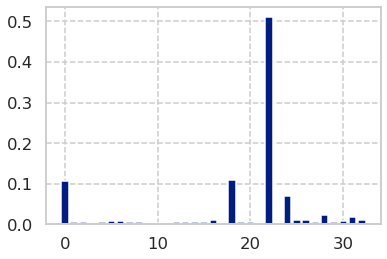

In [54]:
print('Initializing xgboost.sklearn.XGBClassifier and starting training...')

st = datetime.now()

clf = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=20, 
    gamma=10, 
    n_estimators=500)

clf.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=True)

print(datetime.now()-st)

y_pred = clf.predict(X_test)
submission_file_name = 'Submission_'

accuracy = accuracy_score(np.array(y_test).flatten(), y_pred)
print("Accuracy: %.10f%%" % (accuracy * 100.0))
submission_file_name = submission_file_name + ("_Accuracy_%.6f" % (accuracy * 100)) + '_'

accuracy_per_roc_auc = roc_auc_score(np.array(y_test).flatten(), y_pred)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))
submission_file_name = submission_file_name + ("_ROC-AUC_%.6f" % (accuracy_per_roc_auc * 100))

final_pred = pd.DataFrame(clf.predict_proba(np.array(finaltest)))
dfSub = pd.concat([test_member_id, final_pred.loc[:, 1:2]], axis=1)
dfSub.rename(columns={1:'loan_status'}, inplace=True)
dfSub.to_csv((('%s.csv') % (submission_file_name)), index=False)

import matplotlib.pyplot as plt
print(clf.feature_importances_)
idx = 0
for x in list(finaltrain):
    print('%d %s' % (idx, x))
    idx = idx + 1
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()